# Project 4: Regression Analysis and Define Your Own Task!

## Group Members
- Shaira Alam

- Vani Agrawal 

- Dhakshina Ilango

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1

## Dataset 1

In [5]:
# Read the CSV file into a DataFrame
diamonds_data = pd.read_csv("diamonds_ece219.csv").select_dtypes(include=['number'])

# Display the first few rows of the DataFrame to verify data is loaded correctly
print(diamonds_data.head())

   Unnamed: 0  carat  depth_percent  table_percent  length  width  depth  \
0           0   0.09           62.7           59.0    2.85   2.87   1.79   
1           1   0.09           61.9           59.0    2.84   2.89   1.78   
2           2   0.09           61.1           59.0    2.88   2.90   1.77   
3           3   0.09           62.0           59.0    2.86   2.88   1.78   
4           4   0.09           64.9           58.5    2.79   2.83   1.82   

   price  
0    200  
1    200  
2    200  
3    200  
4    200  


## Dataset 2

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

## 1.1
### Plot a heatmap of the Pearson correlation matrix of the dataset columns. 

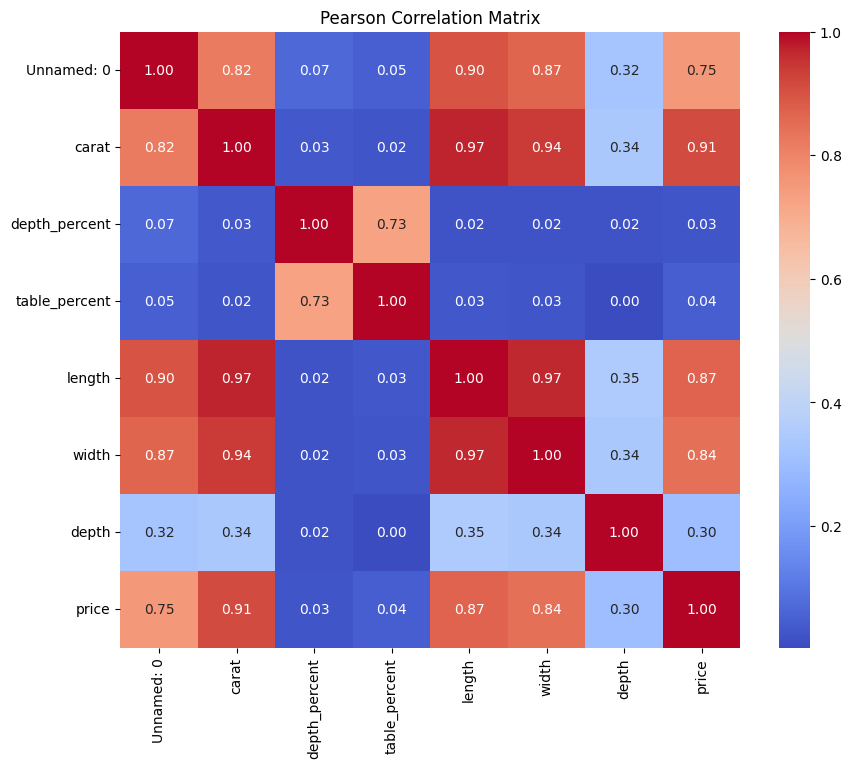

In [7]:
# Calculate the Pearson correlation matrix
corr_matrix = diamonds_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


### Report which features have the highest absolute correlation with the target variable. 

In [8]:
# Find features with highest absolute correlation with the target variable
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
highest_corr_features = target_corr[1:]  # Excluding the target variable itself

print("Features with highest absolute correlation with the target variable (price):\n", highest_corr_features)

Features with highest absolute correlation with the target variable (price):
 carat            0.913479
length           0.869521
width            0.841887
Unnamed: 0       0.753482
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64


### In the context of either dataset, describe what the correlation patterns suggest.

## 1.2

### Plot the histogram of numerical features.

### What preprocessing can be done if the distribution of a feature has high skewness?

## 1.3

### Construct and inspect the box plot of categorical features vs target variable.

### What do you find?

## 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity.

# Question 2

## 2.1
Standardize feature columns and prepare them for training.

## 2.2

### Describe how this step qualitatively affects the performance of your models in terms of test RMSE. 

### Is it true for all model types? 

### Also list two features for either dataset that has the lowest MI w.r.t to the target.

# Question 3

## 3.1 Training

## 3.2 Evaluation

# Question 4

## 4.0 Train Models

Ordinary least squares (linear regression without regularization)

Lasso

Ridge regression

## 4.1

## 4.2

## 4.3

## 4.4

# Question 5

## 5.1

## 5.2

# Question 6

## 6.1

## 6.2

## 6.3

## 6.4

# Question 7

## 7.1

## 7.2

## 7.3

## 7.4

# Question 8

## 8.1

## 8.2

## 8.3

# Question 9

## 9.1

## 9.2

# Question 10

## 10.1

## 10.2

## 10.3

## 10.4